<a href="https://colab.research.google.com/github/TomasValadao/DataVisualization-PUC-Rio/blob/main/data_viz_mvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP: Análise de Dados e Boas Práticas
## Tomás Cavalcante Valadão

# 1. Definição do Problema

O dataset escolhido para a realização deste trabalho é composto por dados de alguns títulos da plataforma de streaming Netflix, juntamente com os profissionais que participaram de sua criação. Dentro desse dataset, podemos encontrar algumas informações quantitativas referentes à percepção da qualidade dessas produções audiovisuais, expressa pela nota na plataforma IMDb.

A plataforma IMDb (Internet Movie Database) é uma das maiores plataformas onlines do mundo cujo tema está relacionado a classificação de produções audiovisuais. Além do IMDb, podemos encontrar notas dessas produções pelo TMDb (The Movie Database).

O trabalho a seguir tem como objetivo fazer uma análise exploratória do dataset em questão e tentar encontrar alguma relação entre o país que ajudou na produção do título e seu sucesso, de acordo com as notas do IMDb, além de algum tipo de tendência entre os títulos de sucesso e seus respectivos gêneros.

Os dados utilizados nesse relatório de análise exploratória pode ser encontrado na plataforma [Kaggle](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies).

Nesse trabalho, nós temos 2 datasets que seguem um padrão de normalização dos dados, onde o dataset "credits" podem se juntar com o dataset "titles" via chave estrangeira referenciado o identificador único do título.

Dataset Titles:
1. ID = Identificador único do título
2. Title = Nome do título
3. Type = Tipo de produção
4. Description = Descrição do título
5. Release Year = Ano do lançamento
6. Age Certification = Nota do sistema de classificação indicativa
7. Runtime = Duração
8. Genres = Gênero do título
9. Production Countries = Países que fizeram parte da produção do título
10. Seasons = Número de temporadas
11. IMDb ID = Identificador do título no IMDb
12. IMDb Score = Nota do Título no IMDb
13. IMDb Votes = Quantidades de votos no IMDb
14. TMDb Popularity = Métrica de popularidade no TMDb
15. TMDb Score = Nota do Título no TMDb

Dataset Credits:
1. Person ID = Identificador de um profissional
2. ID = Identificador do título
3. Name = Nome do profissional
4. Character = Nome do Personagem
5. Role = Papel do profissional no título

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_point, xlim, ylim, geom_jitter, geom_abline, theme_set, theme_bw, geom_histogram, geom_bar, ylab
from itertools import zip_longest
import ast

# 2. Análise inicial dos dados

In [2]:
# Trazendo os dados dos títulos para o notebook

path_titles = "https://raw.githubusercontent.com/TomasValadao/DataVisualization-PUC-Rio/main/titles.csv"

df_titles = pd.read_csv(path_titles)
df_titles.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156


In [3]:
# Trazendo os dados dos títulos para o credits

path_credits = "https://raw.githubusercontent.com/TomasValadao/DataVisualization-PUC-Rio/main/credits.csv"

df_credits = pd.read_csv(path_credits)
df_credits.head(10)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
5,32267,tm84618,Peter Boyle,Wizard,ACTOR
6,519612,tm84618,Leonard Harris,Senator Charles Palantine,ACTOR
7,29068,tm84618,Diahnne Abbott,Concession Girl,ACTOR
8,519613,tm84618,Gino Ardito,Policeman at Rally,ACTOR
9,3308,tm84618,Martin Scorsese,Passenger Watching Silhouette,ACTOR


Para não precisarmos ficar manipulando dois DataFrames, nós vamos juntar os 2 conjuntos de dados em um só via operação de Inner Join. (Caso tenha registros que não se conectam, nós iremos jogá-los fora).

In [4]:
df_merged = pd.merge(df_titles, df_credits, on='id', how='inner')
df_merged.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR
5,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,32267,Peter Boyle,Wizard,ACTOR
6,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,519612,Leonard Harris,Senator Charles Palantine,ACTOR
7,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,29068,Diahnne Abbott,Concession Girl,ACTOR
8,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,519613,Gino Ardito,Policeman at Rally,ACTOR
9,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3308,Martin Scorsese,Passenger Watching Silhouette,ACTOR


In [5]:
# Agora vamos verificar se perdemos alguma informação por falta de conexão entre os 2 DataFrames. Nós esperamos encontrar uma tuple com (Maior Número de Linhas entre os 2, (Colunas 2 + Colunas DF 2) - 1)

print(df_titles.shape)
print(df_credits.shape)
print(df_merged.shape)

(5850, 15)
(77801, 5)
(77801, 19)


Como podemos ver na análise a seguir, nem todas as colunas são preenchidas para todos os 77801 registros desse dataset. Com isso, nós vamos precisar analisar pra ver se essa falta de informação é de fato um erro ou se existe alguma regra que possa aceitar esse tipo de registro.

In [6]:
# Visão geral do dataset utilizado
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    77801 non-null  object 
 1   title                 77800 non-null  object 
 2   type                  77801 non-null  object 
 3   description           77763 non-null  object 
 4   release_year          77801 non-null  int64  
 5   age_certification     46658 non-null  object 
 6   runtime               77801 non-null  int64  
 7   genres                77801 non-null  object 
 8   production_countries  77801 non-null  object 
 9   seasons               14710 non-null  float64
 10  imdb_id               74302 non-null  object 
 11  imdb_score            73851 non-null  float64
 12  imdb_votes            73764 non-null  float64
 13  tmdb_popularity       77790 non-null  float64
 14  tmdb_score            76664 non-null  float64
 15  person_id          

In [7]:
# Agora vamos checar se temos alguma coluna com valores nulos
print(df_merged.isnull().any())

id                      False
title                    True
type                    False
description              True
release_year            False
age_certification        True
runtime                 False
genres                  False
production_countries    False
seasons                  True
imdb_id                  True
imdb_score               True
imdb_votes               True
tmdb_popularity          True
tmdb_score               True
person_id               False
name                    False
character                True
role                    False
dtype: bool


Como podemos ver, nosso dataset possui valores nulos em algumas colunas; no entanto, temos algumas regras em que o valor nulo pode ser aceito.

Elas são:
1. A coluna Seasons pode ser nula, quando o título em questão for considerado um título do tipo "MOVIE".
2. A coluna Character pode ser nula, quando o profissional em questão tiver uma Role do tipo "DIRECTOR".

No entanto, podemos ver que temos valores que precisam ser tratados. Podemos também destacar que a estatística descritiva não nos ajuda muito em alguns casos de valores não númericos, mas nós faremos uma análise mais aprofundada na seção 3 do relatório


In [8]:
df_merged.describe(include='all')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
count,77801,77800,77801,77763,77801.000000,46658,77801.00000,77801,77801,14710.000000,74302,73851.000000,7.376400e+04,77790.000000,76664.000000,7.780100e+04,77801,68029,77801
unique,5489,5440,2,5478,NaN,11,NaN,1675,447,NaN,5120,NaN,NaN,NaN,NaN,NaN,54314,47274,2
top,tm32982,Les Misérables,MOVIE,An adaptation of the successful stage musical ...,NaN,R,NaN,['comedy'],['US'],NaN,tt1707386,NaN,NaN,NaN,NaN,NaN,Boman Irani,Self,ACTOR
freq,208,208,63091,208,NaN,15524,NaN,4286,28746,NaN,208,NaN,NaN,NaN,NaN,NaN,25,1950,73251
mean,NaN,NaN,NaN,NaN,2015.347502,NaN,95.89333,NaN,NaN,2.041672,NaN,6.464191,6.514068e+04,30.135350,6.713149,5.294888e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,7.905682,NaN,35.74371,NaN,NaN,2.244178,NaN,1.117023,1.924342e+05,88.656155,1.031912,6.430167e+05,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1954.000000,NaN,0.00000,NaN,NaN,1.000000,NaN,1.500000,5.000000e+00,0.600000,1.000000,7.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2014.000000,NaN,82.00000,NaN,NaN,1.000000,NaN,5.800000,1.447000e+03,5.053000,6.100000,4.530600e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,100.00000,NaN,NaN,1.000000,NaN,6.500000,6.357000e+03,11.466000,6.751000,1.983580e+05,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,117.00000,NaN,NaN,2.000000,NaN,7.300000,4.150800e+04,25.254000,7.400000,8.880960e+05,NaN,NaN,NaN


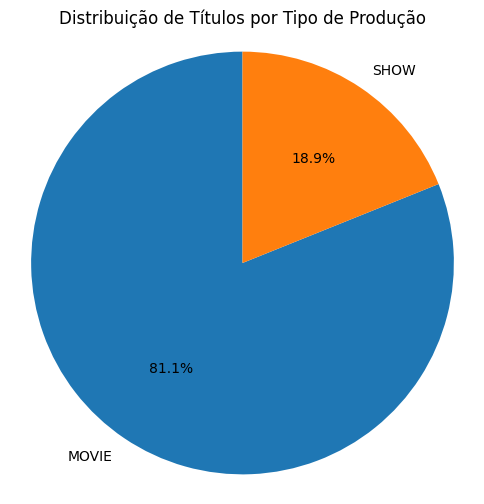

In [9]:
# Como análise inicial, podemos ver que a maior parte do catálogo da plataforma Netflix é composta por filmes.

type_counts = df_merged['type'].value_counts()
type_percentages = df_merged['type'].value_counts(normalize=True) * 100

df_type_analysis = pd.DataFrame({'Quantidade de Títulos': type_counts, 'Porcentagem (%)': type_percentages})

plt.figure(figsize=(6, 6))
plt.pie(df_type_analysis['Porcentagem (%)'], labels=df_type_analysis.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Títulos por Tipo de Produção')
plt.axis('equal')
plt.show()

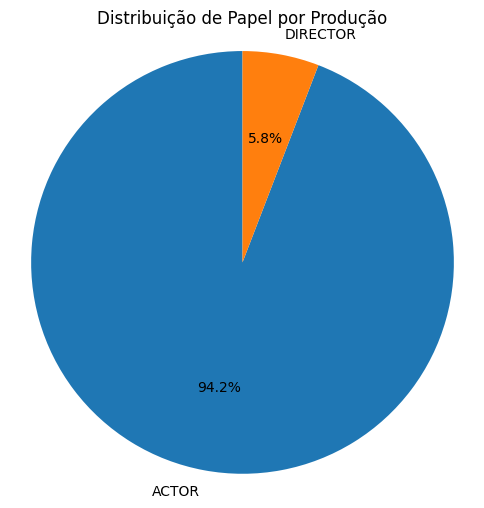

In [10]:
# Podemos ver também que o cadastro tem muito mais atores que diretores. Vale lembrar que pode existir repetição, visto que temos vários filmes onde um profissional pode ter trabalhado.

role_counts = df_merged['role'].value_counts()
role_percentages = df_merged['role'].value_counts(normalize=True) * 100

df_role_analysis = pd.DataFrame({'Papel': role_counts, 'Porcentagem (%)': role_percentages})

plt.figure(figsize=(6, 6))
plt.pie(df_role_analysis['Porcentagem (%)'], labels=df_role_analysis.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Papel por Produção')
plt.axis('equal')
plt.show()

# 3. Pré-processamento de Dados

Nós vamos remover os valores nulos do dataset para que esses não impactem a análise exploratória. Vamos considerar um registro é inteiramente inválido se ele tiver qualquer coluna nula e que não tenha uma explicação para isso.

In [11]:
# Remove as colunas que foram identificadas com valores nulos, exceto as colunas 'seasons' e a 'character'
df_cleaned = df_merged.dropna(subset=['title', 'description', 'age_certification', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'])
print(df_cleaned.isnull().any())
print(df_cleaned.shape)

id                      False
title                   False
type                    False
description             False
release_year            False
age_certification       False
runtime                 False
genres                  False
production_countries    False
seasons                  True
imdb_id                 False
imdb_score              False
imdb_votes              False
tmdb_popularity         False
tmdb_score              False
person_id               False
name                    False
character                True
role                    False
dtype: bool
(44560, 19)


In [12]:
# Garantindo que não tem nenhum show sem a marcação de 'seasons'
seasons_validation = df_cleaned[df_cleaned['seasons'].notnull() & (df_cleaned['type'] == 'SHOW')]
movies_validation = df_cleaned[df_cleaned['seasons'].isnull() & (df_cleaned['type'] == 'MOVIE')]

print(seasons_validation.shape)
print(movies_validation.shape)

# Garantindo a consistência dos dados
print(seasons_validation.shape[0] + movies_validation.shape[0] == df_cleaned.shape[0])

(12177, 19)
(32383, 19)
True


In [13]:
# Garantindo que não tem nenhum diretor tem marcação de character

actor_validation = df_cleaned[df_cleaned['character'].notnull() & (df_cleaned['role'] == 'ACTOR')]
director_validation = df_cleaned[df_cleaned['character'].isnull() & (df_cleaned['type'] == 'DIRECTOR')]

print(actor_validation.shape)
print(director_validation.shape)

# Podemos ver que não temos a consistência do cadastro
print(actor_validation.shape[0] + director_validation.shape[0] == df_cleaned.shape[0])

(41122, 19)
(0, 19)
False


In [14]:
# Como tivemos uma validação falsa pra ator, nós vamos remover esses cadastros e considerarmos que o ator não participou do filme.

invalid_actor_participations = df_cleaned[df_cleaned['character'].isnull() & (df_cleaned['role'] == 'ACTOR')]
print(invalid_actor_participations.head(5))

            id                 title   type  \
182    tm70993         Life of Brian  MOVIE   
1032   ts21715      Thomas & Friends   SHOW   
1154  tm142895            Lean On Me  MOVIE   
1155  tm142895            Lean On Me  MOVIE   
2777   ts22193  The Magic School Bus   SHOW   

                                            description  release_year  \
182   Brian Cohen is an average young Jewish man, bu...          1979   
1032  Thomas & Friends is a British children's telev...          1984   
1154  When principal Joe Clark takes over decaying E...          1989   
1155  When principal Joe Clark takes over decaying E...          1989   
2777  An eccentric schoolteacher takes her class on ...          1994   

     age_certification  runtime  \
182                  R       94   
1032              TV-Y       10   
1154             PG-13      105   
1155             PG-13      105   
2777              TV-Y       26   

                                                 genres production_

In [15]:
# O DataFrame limpo vai passar a excluir os registros dos atores sem personagem.
df_cleaned = df_cleaned[~(df_cleaned['character'].isnull() & (df_cleaned['role'] == 'ACTOR'))]
print(df_cleaned.isnull().any())
print(df_cleaned.shape)
print(df_cleaned.head(5))

id                      False
title                   False
type                    False
description             False
release_year            False
age_certification       False
runtime                 False
genres                  False
production_countries    False
seasons                  True
imdb_id                 False
imdb_score              False
imdb_votes              False
tmdb_popularity         False
tmdb_score              False
person_id               False
name                    False
character                True
role                    False
dtype: bool
(42971, 19)
        id        title   type  \
0  tm84618  Taxi Driver  MOVIE   
1  tm84618  Taxi Driver  MOVIE   
2  tm84618  Taxi Driver  MOVIE   
3  tm84618  Taxi Driver  MOVIE   
4  tm84618  Taxi Driver  MOVIE   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  A mentally unstable Vietnam War veteran works ...         

In [16]:
# Agora que temos um dataset um pouco mais limpo, nós vamos puxar a estatística descritiva novamente.
df_cleaned.describe(include='all')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
count,42971,42971,42971,42971,42971.000000,42971,42971.000000,42971,42971,11258.000000,42971,42971.000000,4.297100e+04,42971.000000,42971.000000,4.297100e+04,42971,41122,42971
unique,2711,2695,2,2711,NaN,11,NaN,1204,233,NaN,2711,NaN,NaN,NaN,NaN,NaN,32587,30960,2
top,tm32982,Les Misérables,MOVIE,An adaptation of the successful stage musical ...,NaN,R,NaN,['comedy'],['US'],NaN,tt1707386,NaN,NaN,NaN,NaN,NaN,Kareena Kapoor Khan,Self,ACTOR
freq,208,208,31713,208,NaN,14804,NaN,1771,20628,NaN,208,NaN,NaN,NaN,NaN,NaN,19,730,41122
mean,NaN,NaN,NaN,NaN,2014.068674,NaN,94.473319,NaN,NaN,2.230414,NaN,6.654153,1.056221e+05,41.250591,6.869382,4.558318e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,8.249646,NaN,38.384149,NaN,NaN,2.445394,NaN,1.093939,2.419610e+05,108.050113,0.946464,6.141173e+05,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1966.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,2.000000,5.000000e+00,0.600000,1.000000,7.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2012.000000,NaN,68.000000,NaN,NaN,1.000000,NaN,6.000000,4.145500e+03,9.595000,6.200000,2.424250e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2017.000000,NaN,100.000000,NaN,NaN,1.000000,NaN,6.800000,2.185500e+04,17.405000,6.900000,1.118340e+05,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,119.000000,NaN,NaN,3.000000,NaN,7.400000,9.837000e+04,35.497000,7.500000,7.541310e+05,NaN,NaN,NaN


Para efeitos de uma análise um pouco mais detalhada, nós iremos remover algumas colunas que nós vamos passar a assumir que não tem relevência para as perguntas que a gente quer responder.

In [17]:
# Reduzindo o escopo das informações para que possamos ter uma análise mais aprofundada

deletable_columns = ['description', 'age_certification', 'runtime', 'seasons', 'tmdb_popularity', 'tmdb_score']

for column in deletable_columns:
  if column in df_cleaned.columns:
    df_cleaned.drop(columns=['description', 'age_certification', 'runtime', 'seasons', 'tmdb_popularity', 'tmdb_score'], inplace=True)


df_cleaned.head(5)

,id,title,type,release_year,genres,production_countries,imdb_id,imdb_score,imdb_votes,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,1976,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,1976,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,1976,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,1976,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,1976,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,48933,Cybill Shepherd,Betsy,ACTOR


Agora que nós temos informações relativas a produção, gêneros, país e ator, nós vamos explodir os campos do tipo "Lista" para podermos tratar os dados de forma relacional.

In [18]:
try:
  df_cleaned['genres'] = df_cleaned['genres'].apply(ast.literal_eval)
  df_cleaned['production_countries'] = df_cleaned['production_countries'].apply(ast.literal_eval)
except:
  print("Cast was already made.")

In [19]:
# DataFrame que será utilizado para visualizar os dados dos gêneros

df_exploded_genres = df_cleaned.explode('genres')
df_exploded_genres = df_exploded_genres.dropna(subset=['genres'])

print(df_exploded_genres.shape)
print(df_exploded_genres['genres'].unique())

df_exploded_genres.head(5)

(136457, 13)
['drama' 'crime' 'action' 'thriller' 'european' 'fantasy' 'comedy'
 'romance' 'western' 'documentation' 'history' 'war' 'music' 'horror'
 'scifi' 'family' 'animation' 'reality' 'sport']


,id,title,type,release_year,genres,production_countries,imdb_id,imdb_score,imdb_votes,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,1976,drama,[US],tt0075314,8.2,808582.0,3748,Robert De Niro,Travis Bickle,ACTOR
0,tm84618,Taxi Driver,MOVIE,1976,crime,[US],tt0075314,8.2,808582.0,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,1976,drama,[US],tt0075314,8.2,808582.0,14658,Jodie Foster,Iris Steensma,ACTOR
1,tm84618,Taxi Driver,MOVIE,1976,crime,[US],tt0075314,8.2,808582.0,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,1976,drama,[US],tt0075314,8.2,808582.0,7064,Albert Brooks,Tom,ACTOR


In [20]:
# DataFrame que será utilizado para visualizar os dados dos países

df_exploded_countries = df_cleaned.explode('production_countries')
df_exploded_countries = df_exploded_countries.dropna(subset=['production_countries'])

print(df_exploded_countries.shape)
print(df_exploded_countries['production_countries'].unique())

df_exploded_countries.head(5)

(54829, 13)
['US' 'GB' 'DE' 'IT' 'CA' 'JP' 'FR' 'PE' 'BR' 'IE' 'HK' 'AU' 'IN' 'AR'
 'MX' 'ES' 'NO' 'LB' 'BE' 'DK' 'MT' 'ZA' 'CN' 'RU' 'KR' 'CO' 'TR' 'TW'
 'NG' 'PH' 'AE' 'HU' 'CL' 'SG' 'CH' 'FI' 'IL' 'PL' 'IS' 'XX' 'NZ' 'LU'
 'BG' 'UA' 'IR' 'JO' 'QA' 'GH' 'HR' 'NL' 'SE' 'AT' 'RO' 'PR' 'ID' 'CZ'
 'TH' 'KH' 'VA' 'RS' 'ZW' 'PK' 'MC' 'CY' 'SN' 'LT' 'AL' 'PT' 'MY' 'MU'
 'EG' 'GR' 'KN' 'MA' 'SA' 'TN']


,id,title,type,release_year,genres,production_countries,imdb_id,imdb_score,imdb_votes,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,1976,"[drama, crime]",US,tt0075314,8.2,808582.0,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,1976,"[drama, crime]",US,tt0075314,8.2,808582.0,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,1976,"[drama, crime]",US,tt0075314,8.2,808582.0,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,1976,"[drama, crime]",US,tt0075314,8.2,808582.0,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,1976,"[drama, crime]",US,tt0075314,8.2,808582.0,48933,Cybill Shepherd,Betsy,ACTOR


# 4. Análise dos Dados

Nessa seção, nós iremos tentar responder 3 perguntas:

1. Quais países tendem a participar das melhores produções audiovisuais?
2. Quais gêneros das produções audiovisuais são mais bem avaliadas pelo público?

Obs.: Para evitar problemas com valores extremos, as medida de sucesso será a mediana da avaliação do público no IMDb.


### 4.1 Países que participaram das melhores produções audiovisuais.

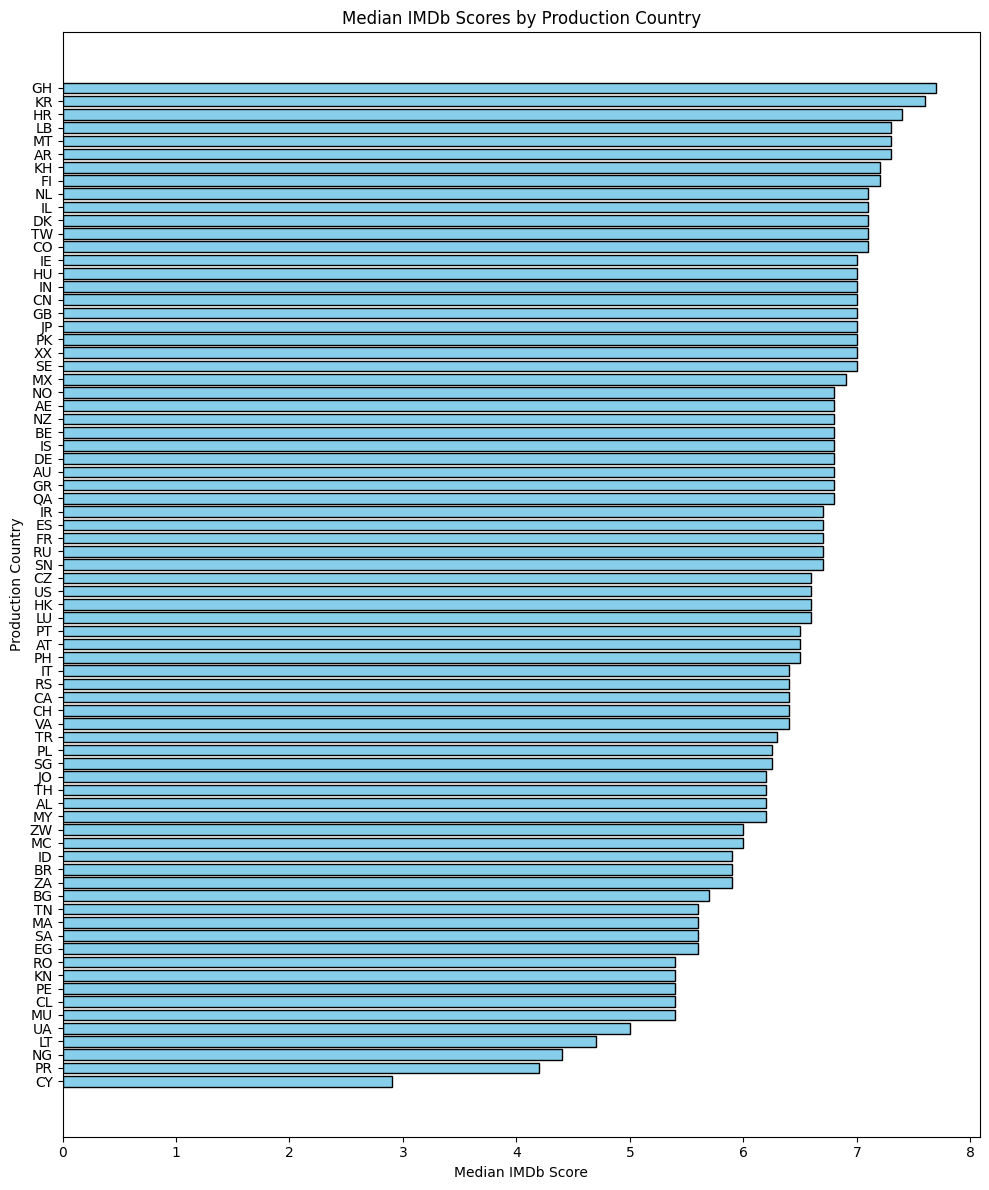

In [21]:
# Ordenando os países pela Mediana
country_median_scores = df_exploded_countries.groupby('production_countries')['imdb_score'].median()
country_median_scores_sorted = country_median_scores.sort_values(ascending=True)

# Plot the median IMDb scores as a horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(country_median_scores_sorted.index, country_median_scores_sorted.values, color='skyblue', edgecolor='black')

plt.title('Median IMDb Scores by Production Country')
plt.xlabel('Median IMDb Score')
plt.ylabel('Production Country')

plt.tight_layout()
plt.show()

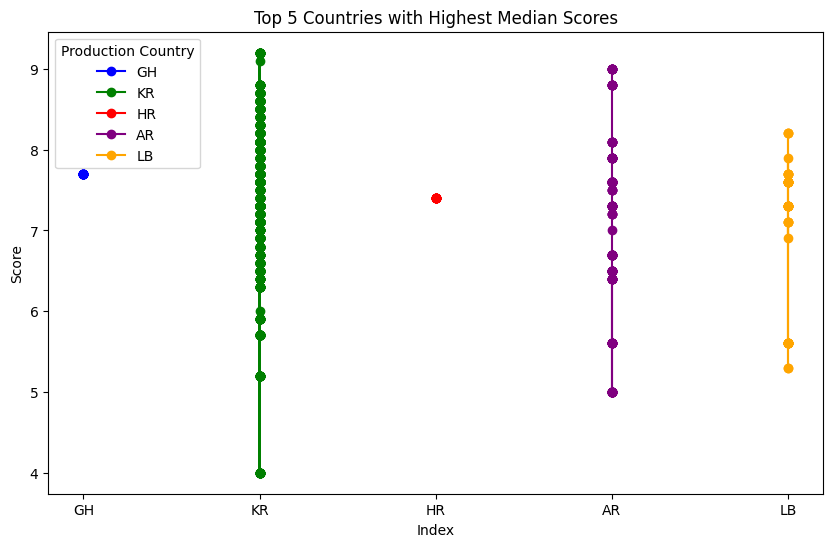

In [22]:
# Get the top 5 countries with the highest median scores
top_5_countries = country_median_scores.nlargest(5).index

# Plot line chart for the top 5 countries based on highest scores
plt.figure(figsize=(10, 6))

colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot each of the top 5 countries separately as a line
for i, country in enumerate(top_5_countries):
    subset = df_exploded_countries[df_exploded_countries['production_countries'] == country]
    plt.plot(subset['production_countries'], subset['imdb_score'], label=country, marker='o', color=colors[i])

plt.title('Top 5 Countries with Highest Median Scores')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend(title='Production Country')
plt.show()

Podemos ver que os países GH (Gana), KR (Coréia do Sul), HR (Croácia), AR (Argentina), LB (Líbano) tiverem participam relevante na execução das produções audiovisuais.

In [23]:
print("Gana: " + df_exploded_countries[df_exploded_countries["production_countries"] == "GH"]["title"].unique())
print("Korea: " + df_exploded_countries[df_exploded_countries["production_countries"] == "KR"]["title"].unique())
print("Croatia: " + df_exploded_countries[df_exploded_countries["production_countries"] == "HR"]["title"].unique())
print("Argentina: " + df_exploded_countries[df_exploded_countries["production_countries"] == "AR"]["title"].unique())
print("Lebanon: " + df_exploded_countries[df_exploded_countries["production_countries"] == "LB"]["title"].unique())

['Gana: Beasts of No Nation']
['Korea: Boys Over Flowers' 'Korea: Iris' 'Korea: Larva'
 'Korea: Robocar Poli' 'Korea: The Nut Job' 'Korea: Incomplete Life'
 'Korea: That Winter, the Wind Blows' 'Korea: Reply 1988' 'Korea: Signal'
 'Korea: Cinderella and Four Knights' 'Korea: The Haunted House'
 'Korea: The K2' 'Korea: Pandora' 'Korea: Nightmare Teacher'
 'Korea: Another Miss Oh' 'Korea: Dear My Friends'
 'Korea: Hello, My Twenties!' 'Korea: The Miracle' 'Korea: My Runway'
 'Korea: One More Time' 'Korea: Okja' 'Korea: Stranger' 'Korea: My Mister'
 'Korea: Mr. Sunshine' 'Korea: Illang: The Wolf Brigade'
 'Korea: The Bride of Habaek' 'Korea: The Guest'
 'Korea: Because This Is My First Life' 'Korea: Just Between Lovers'
 'Korea: Voice' 'Korea: Black' 'Korea: Memories of the Alhambra'
 'Korea: The Beauty Inside' 'Korea: Welcome to Waikiki'
 'Korea: SKY Castle' 'Korea: Lawless Lawyer'
 'Korea: Clean with Passion for Now' 'Korea: A Korean Odyssey'
 'Korea: Something in the Rain' 'Korea: Revo

### 4.2 Gêneros das melhores produções audiovisuais

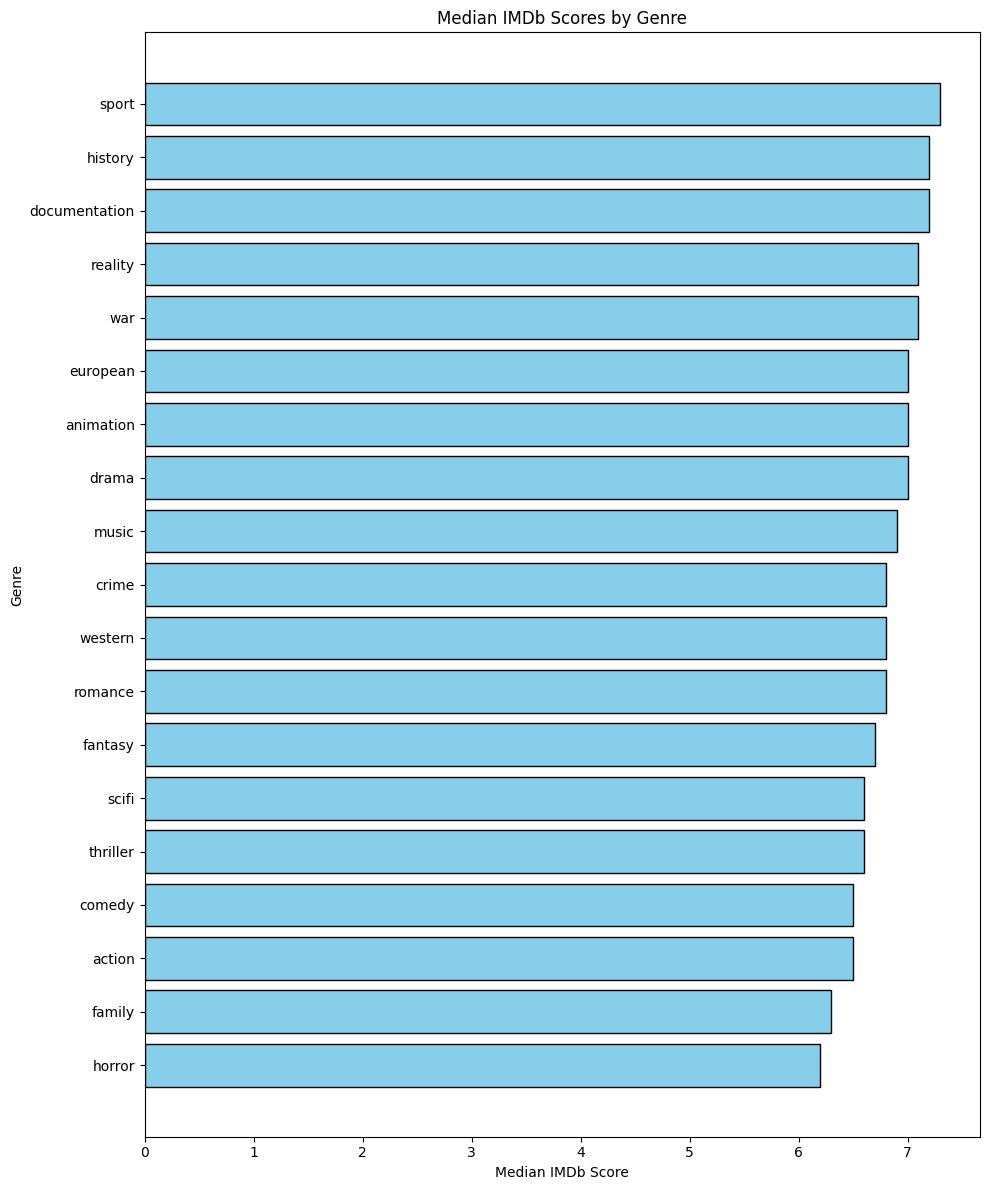

In [24]:
# Ordenando os gêneros pela Mediana
genres_median_scores = df_exploded_genres.groupby('genres')['imdb_score'].median()
genres_median_scores_sorted = genres_median_scores.sort_values(ascending=True)

# Plot the median IMDb scores as a horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(genres_median_scores_sorted.index, genres_median_scores_sorted.values, color='skyblue', edgecolor='black')

plt.title('Median IMDb Scores by Genre')
plt.xlabel('Median IMDb Score')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()

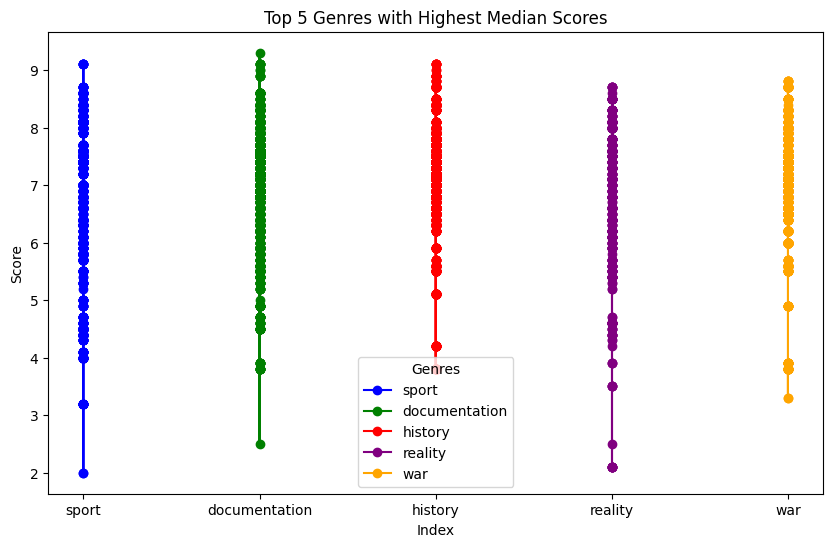

In [25]:
# Get the top 5 genres with the highest median scores
top_5_genres = genres_median_scores.nlargest(5).index

# Plot line chart for the top 5 countries based on highest scores
plt.figure(figsize=(10, 6))

colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot each of the top 5 countries separately as a line
for i, country in enumerate(top_5_genres):
    subset = df_exploded_genres[df_exploded_genres['genres'] == country]
    plt.plot(subset['genres'], subset['imdb_score'], label=country, marker='o', color=colors[i])

plt.title('Top 5 Genres with Highest Median Scores')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend(title='Genres')
plt.show()

Podemos ver que os gêneros mais aclamados pelo público são Sport, Documentation, History, Reality e War.

In [27]:
print("Sport: " + df_exploded_genres[df_exploded_genres["genres"] == "sport"]["title"].unique())
print("Documentation: " + df_exploded_genres[df_exploded_genres["genres"] == "documentation"]["title"].unique())
print("History: " + df_exploded_genres[df_exploded_genres["genres"] == "history"]["title"].unique())
print("Reality: " + df_exploded_genres[df_exploded_genres["genres"] == "reality"]["title"].unique())
print("War: " + df_exploded_genres[df_exploded_genres["genres"] == "war"]["title"].unique())

['Sport: The Replacements' 'Sport: 3 Ninjas Kick Back'
 'Sport: The Next Karate Kid' 'Sport: 30 Rock'
 'Sport: Friday Night Lights' 'Sport: Victorious' 'Sport: The Blind Side'
 'Sport: Semi-Pro' 'Sport: We Are Marshall' 'Sport: Blood and Bone'
 'Sport: Lagaan: Once Upon a Time in India' 'Sport: Ip Man 2'
 'Sport: Dreamer: Inspired By a True Story' 'Sport: The Game'
 'Sport: Kurbaan' 'Sport: Black & White' 'Sport: Dhan Dhana Dhan Goal'
 'Sport: Hattrick' 'Sport: Soul Surfer' 'Sport: Here Comes the Boom'
 "Sport: Kuroko's Basketball" 'Sport: Undefeated'
 'Sport: Paan Singh Tomar' 'Sport: Ferrari Ki Sawaari' 'Sport: Rush'
 'Sport: 42' 'Sport: The Battered Bastards of Baseball'
 'Sport: Yowamushi Pedal' 'Sport: Turbo FAST' 'Sport: The Short Game'
 'Sport: Mary Kom' 'Sport: Last Chance U' 'Sport: Bella and the Bulldogs'
 'Sport: Brothers' 'Sport: Jada' 'Sport: Hajwala: The Missing Engine'
 'Sport: Cobra Kai' 'Sport: All American' "Sport: Molly's Game"
 'Sport: GLOW' 'Sport: BAKI' "Sport: Su

# 5. Conclusão

Neste MVP foi possível fazer algumas análises sobre o entendimento do gosto do público em relação as produções audiovisuais, como o caso do filme "Beasts of No Nation" que foi corretamente identificado na análise e que foi um dos destaques da Netflix, segundo a reportagem da [b9](https://www.b9.com.br/61309/controverso-dentro-e-fora-da-tela-beasts-of-no-nation-ja-e-um-marco-na-industria/). Além disso, encontramos uma tendência de sucesso das produções audiovisuais de alguns países, inclusive países que ja eram de se esperar e forma confirmados com a análise. Um desses países foi a Córeia do Sul que tem manchetes relacionados a investimento da Netflix no país ([Netflix na Córeia do Sul](https://www1.folha.uol.com.br/ilustrada/2024/02/chefe-da-netflix-na-coreia-do-sul-defende-politica-publica-para-producao-audiovisual.shtml)).

Com base nesse trabalho, é possível identificar alguns padrões de gosto do público e decisões acertadas da Netflix em relação a investimento. No entanto, por falta de recurso computacional, não foi possível fazer uma análise mais detalhada a nível de profissional da área da atuação (ator/diretor) para que a gente pudesse ter um certo entendimento de qual é o profissional que gera produções mais bem avaliadas pelo público.

Em análises futuras, seria interessante ter uma base de dados adicional relacionando investimento e retorno, pois podemos ter o caso de uma produção audiovisual bem-sucedida, na visão do público, que não foi bem-sucedida a nível de negócios. Além disso, será interessante seguir esses insights extraídos nesta análise como uma previsão de tendência do gosto do público e onde seria interessante alocar recursos em novas produções, resultando em um problema de regressão, caso atribuamos uma nota ao potencial grau de investimento.

# 6. Referências
[Kaggle - Netflix TV Shows](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies)
